In [18]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [19]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468) 
  
# data (as pandas dataframes) 
X = online_shoppers_purchasing_intention_dataset.data.features 
y = online_shoppers_purchasing_intention_dataset.data.targets 
  
# metadata 
print(online_shoppers_purchasing_intention_dataset.metadata) 
  
# variable information 
print(online_shoppers_purchasing_intention_dataset.variables) 




{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'title': 'Real-time prediction of online shoppers’ purchasing intention using multi

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#Tạo dataframe
df = pd.read_csv('https://archive.ics.uci.edu/static/public/468/data.csv')

df.shape

(12330, 18)

In [22]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
df['Revenue'] = Le.fit_transform(df['Revenue'])
df['Weekend'] = Le.fit_transform(df['Weekend'])
df['Month'] = Le.fit_transform(df['Month'])
df = df.replace({'Returning_Visitor':0, 'New_Visitor':1, 'Other':2})
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_14136\370638826.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Returning_Visitor':0, 'New_Visitor':1, 'Other':2})


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,0,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,0,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,0,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,0,0,0


In [23]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,1,0


In [24]:
df['Revenue'].value_counts()

Revenue
0    10422
1     1908
Name: count, dtype: int64

In [25]:
X = df.iloc[:, :-1]   
y = df.iloc[:, -1]    

#cach 2
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    # Tách dữ liệu theo chỉ số của fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [26]:
#Build model
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)    -cach 1

clf = RandomForestClassifier(
    criterion="gini",            # Tiêu chí đánh giá chất lượng phân chia
    max_depth=8,                 # Chiều cao tối đa của các cây quyết định
    min_samples_split=10,        # Số mẫu tối thiểu để phân chia một nút
    random_state=5)              # Hạt giống cho phép toán ngẫu nhiên

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [27]:
#giá trị đo lường mức độ quan trọng của từng đặc trưng trong việc dự đoán nhãn mục tiêu.
clf.feature_importances_

array([0.02326238, 0.03048005, 0.00865692, 0.01434144, 0.04315254,
       0.066547  , 0.04077894, 0.07593515, 0.60220497, 0.00213798,
       0.04325709, 0.00658237, 0.00633281, 0.00917943, 0.01143287,
       0.01310733, 0.00261074])

In [28]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [29]:
y_pred = clf.predict(X_test)

In [30]:
confusion_matrix(y_test, y_pred)

array([[2026,   58],
       [ 168,  214]], dtype=int64)

In [31]:
accuracy_score(y_test, y_pred)

0.9083536090835361

In [32]:
cross_val_score(clf, X_train, y_train, cv=10)

array([0.91286727, 0.92299899, 0.92806484, 0.89260385, 0.90060852,
       0.88235294, 0.88539554, 0.88539554, 0.89959432, 0.87119675])

In [33]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      2194
           1       0.56      0.79      0.65       272

    accuracy                           0.91      2466
   macro avg       0.77      0.86      0.80      2466
weighted avg       0.93      0.91      0.91      2466



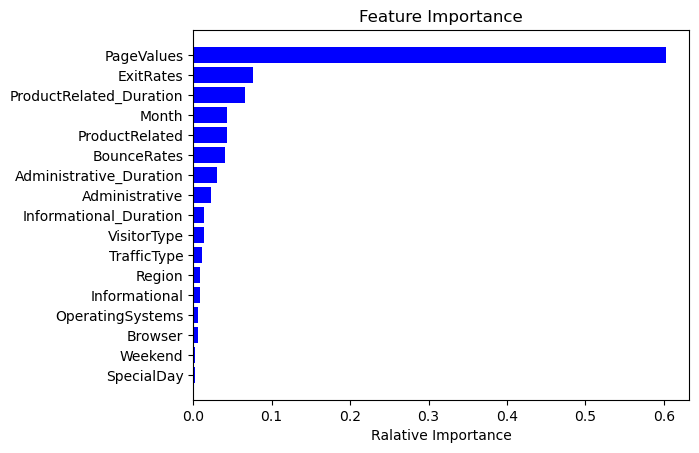

In [37]:
features = df.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Ralative Importance')
plt.show()